In [41]:
#import das bibliotecas necessárias
import matplotlib.pyplot as plt
from functools import cmp_to_key
import random

In [42]:
def orientation(p, q, r):
    """
    Para determinar a orientação do conjunto ordenado (p, q, r).
    Se o resultado for positivo, então a orientação é no sentido horário.
    Se o resultado for negativo, então a orientação é no sentido anti-horário.
    Se o resultado for 0, então p, q e r são colineares.
    """
    return (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)

In [43]:


class Ponto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __sub__(self, other):
        return Ponto(self.x - other.x, self.y - other.y)

    def __repr__(self):
        return f"({self.x}, {self.y})"

    def distancia_ao_quadrado(self, other):
        return (self.x - other.x)**2 + (self.y - other.y)**2

class Segmento:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
    def __repr__(self):
        return f"[{self.p1}, {self.p2}]"

    def intersecao(self, s2):
        """Determina se este segmento intersecta s2."""
        o1 = orientation(self.p1, self.p2, s2.p1)
        o2 = orientation(self.p1, self.p2, s2.p2)
        o3 = orientation(s2.p1, s2.p2, self.p1)
        o4 = orientation(s2.p1, s2.p2, self.p2)

        return (o1 != o2) and (o3 != o4)
    
    def produto_vetorial(self, other):
        return (self.p2.x - self.p1.x) * (other.p2.y - other.p1.y) - (self.p2.y - self.p1.y) * (other.p2.x - other.p1.x)

In [44]:
def ordenacao_polar(p0):
    def compare(p1, p2):
        o = orientation(p0, p1, p2)
        if o == 0:
            return (p1.distancia_ao_quadrado(p0) <= p2.distancia_ao_quadrado(p0)) - 1
        return 1 if o > 0 else -1
    return compare


In [45]:
#ALgoritmo de Graham Scan para criar a envoltoŕia convexa

def graham_scan(pontos):
    pontos = sorted(pontos, key=lambda p: (p.y, p.x))
    p0 = pontos[0]
    pontos_ordenados = sorted(pontos[1:], key=cmp_to_key(ordenacao_polar(p0)))

    envoltoria = [p0, pontos_ordenados[0]]
    for p in pontos_ordenados[1:]:
        # Enquanto a orientação não for anti-horária, remova o último ponto
        while len(envoltoria) > 1 and Segmento(envoltoria[-2], envoltoria[-1]).produto_vetorial(Segmento(envoltoria[-1], p)) <= 0:
            envoltoria.pop()
        envoltoria.append(p)

    # Fechar a envoltória
    if len(envoltoria) > 2:
        envoltoria.append(p0)
    
    return envoltoria


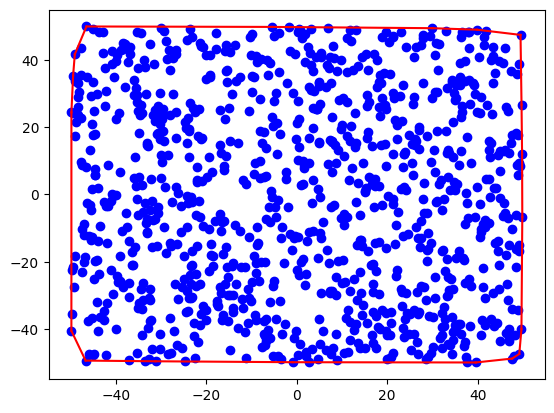

In [46]:
# Função para plotar a envoltória convexa

def plot_envoltoria(pontos, envoltoria):
    # Plotar todos os pontos
    plt.scatter([p.x for p in pontos], [p.y for p in pontos], color='b')

    # Plotar a envoltória convexa
    for i in range(len(envoltoria) - 1):
        plt.plot([envoltoria[i].x, envoltoria[i+1].x], [envoltoria[i].y, envoltoria[i+1].y], color='r')
    
    # Fechar a envoltória
    plt.plot([envoltoria[-1].x, envoltoria[0].x], [envoltoria[-1].y, envoltoria[0].y], color='r')
    
    plt.show()

# Gerar pontos aleatórios para testar o algoritmo e posteriormente plotar a envoltória convexa
pontos = [Ponto(random.uniform(-50, 50), random.uniform(-50, 50)) for _ in range(1000)]
envoltoria = graham_scan(pontos)
plot_envoltoria(pontos, envoltoria)


In [47]:
def sweep_line_intersecao(segmentos):
    endpoints = [(seg.p1, seg) for seg in segmentos] + [(seg.p2, seg) for seg in segmentos]
    endpoints.sort(key=lambda x: x[0].x)

    ativos = set()
    for pt, seg in endpoints:
        if pt == seg.p1:
            # ponto inicial, adicionar o segmento
            ativos.add(seg)
            # Verificar interseções com segmentos adjacentes
            lista_ativos = sorted(ativos, key=lambda s: s.p1.y)
            idx = lista_ativos.index(seg)
            if idx > 0 and seg.intersecao(lista_ativos[idx - 1]):
                return True
            if idx < len(lista_ativos) - 1 and seg.intersecao(lista_ativos[idx + 1]):
                return True
        else:
            # ponto final, remover o segmento
            ativos.remove(seg)

    return False


In [48]:
seg1 = Segmento(Ponto(0, 0), Ponto(5, 5))
seg2 = Segmento(Ponto(0, 5), Ponto(5, 0))
seg3 = Segmento(Ponto(1, 1), Ponto(1, 3))
segmentos = [seg1, seg2, seg3]
print(sweep_line_intersecao(segmentos))  # Deve imprimir True, pois há intersecção entre os segmentos

True


In [49]:
seg1 = Segmento(Ponto(0, 0), Ponto(5, 0))
seg2 = Segmento(Ponto(10, 0), Ponto(15, 0))
segmentos = [seg1, seg2]
print(sweep_line_intersecao(segmentos))  # Deve imprimir False


False
